In [1]:
import numpy as np
import faiss

from scipy.spatial import distance_matrix
from scipy.io import savemat

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot
vapeplot.set_palette('vaporwave')

In [2]:
num_points = 10000

centers = np.array([
    [0.5, 0.5],
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

r = 0.2

np.random.seed(0)
xs = np.random.rand(num_points, 2).astype(np.float32)

# process labels
d = distance_matrix(xs, centers)
onehot = d < r
onehot = np.hstack([((d < 0.25).sum(axis=1) == 0).reshape(-1, 1), onehot])
labels = np.argmax(onehot.astype(int), axis=1) + 1

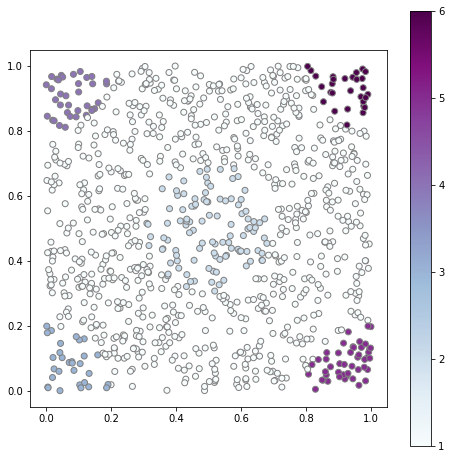

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.scatter(xs[:, 0], xs[:, 1], cmap='BuPu', c=labels, edgecolors='grey')

ax.set_aspect('equal', 'box')
plt.colorbar(c);

In [4]:
k = 5

index = faiss.IndexFlatL2(2)
index.add(xs)

dists, nns = index.search(xs, k + 1)
dists = dists[:, 1:]
sims = np.exp(-dists)
nns = nns[:, 1:] + 1

In [5]:
sims

array([[0.99988836, 0.99937296, 0.9992519 , 0.9988016 , 0.998699  ],
       [0.99979174, 0.99937415, 0.99913627, 0.9980729 , 0.99806917],
       [0.99858737, 0.99844086, 0.998265  , 0.9977992 , 0.9976557 ],
       ...,
       [0.9998962 , 0.99954516, 0.9994456 , 0.99767417, 0.9973574 ],
       [0.999556  , 0.9995336 , 0.99873024, 0.99755776, 0.99745643],
       [0.99984235, 0.9997206 , 0.99962324, 0.9995772 , 0.9994721 ]],
      dtype=float32)

In [6]:
nns

array([[953, 683, 762, 269, 178],
       [550, 886,  54, 272, 540],
       [929,  63, 675, 746, 757],
       ...,
       [629, 652, 541,  12, 732],
       [ 98,  61,  81, 104, 828],
       [213, 608, 540, 461, 448]])

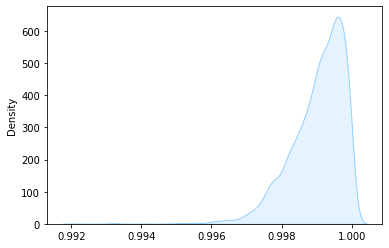

In [7]:
sns.kdeplot(sims.flatten(), shade=True);

In [8]:
if num_points > 50:
    savemat(
        '../../data/square/square_nearest_neighbors.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )
else:
    savemat(
        '../../data/square_small/square_small_nearest_neighbors.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )

In [3]:
for label in range(1, 7):
    print(label, (labels == label).sum() / labels.size)

1 0.7502
2 0.1197
3 0.0334
4 0.033
5 0.0333
6 0.0304
